Installing Libraries

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit pyngrok xgboost lightgbm --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset/energydata_complete.csv")
# df = pd.read_csv("energydata_complete.csv")

Saving energydata_complete.csv to energydata_complete (1).csv


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Description

| Column               | Description                                                                                                                                                       |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`date`**           | Timestamp of data recorded (likely in 10-minute intervals). Format: `DD-MM-YYYY HH:MM`                                                                            |
| **`Appliances`**     | Energy use of home appliances (in **Wh** – watt-hours)                                                                                                            |
| **`lights`**         | Energy use of lights (Wh)                                                                                                                                         |
| **`T1` to `T9`**     | Temperature (°C) at various rooms or zones (T1 = Kitchen, T2 = Living Room, etc.)                                                                                 |
| **`RH_1` to `RH_9`** | Relative humidity (%) in the corresponding zone                                                                                                                   |
| **`T_out`**          | Outside temperature (°C)                                                                                                                                          |
| **`Press_mm_hg`**    | Outside atmospheric pressure (mm Hg)                                                                                                                              |
| **`RH_out`**         | Outside relative humidity (%)                                                                                                                                     |
| **`Windspeed`**      | Wind speed (m/s or possibly km/h depending on source)                                                                                                             |
| **`Visibility`**     | Outdoor visibility (km or m)                                                                                                                                      |
| **`Tdewpoint`**      | Dew point temperature (°C), important for moisture levels                                                                                                         |
| **`rv1`, `rv2`**     | Random variables – often used in datasets for modeling purposes or anonymization. Likely **noise variables** or **engineered features** from the original authors |


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [ ]:
# Drop 'date' column if present
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

In [ ]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

In [ ]:
# ✅ STEP 2: Define target and features
target = 'Appliances'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# Scale features
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler() # Initialize the scaler
X_scaled = scaler.fit_transform(X)

In [ ]:
# ✅ STEP3: Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ✅ STEP 4: Train multiple models and compute Green Score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost': XGBRegressor(n_estimators=100, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100)
}

results_df = pd.DataFrame()

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    temp = pd.DataFrame({
        'Model': name,
        'Actual': y_test.reset_index(drop=True),
        'Predicted': preds
    })

    temp['Green_Score'] = 100 - ((temp['Predicted'] - temp['Predicted'].min()) /
                                 (temp['Predicted'].max() - temp['Predicted'].min()) * 100)
    temp['Green_Score'] = temp['Green_Score'].clip(0, 100)

    results_df = pd.concat([results_df, temp], ignore_index=True)

# Save result to CSV
results_df.to_csv("green_score_results.csv", index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6334
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 27
[LightGBM] [Info] Start training from score 97.949709


In [ ]:
# ✅ STEP 5: Feature Importance using LightGBM
final_model = LGBMRegressor(n_estimators=100)
final_model.fit(X_train, y_train)
importances = final_model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)
imp_df.to_csv("feature_importance.csv", index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6334
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 27
[LightGBM] [Info] Start training from score 97.949709


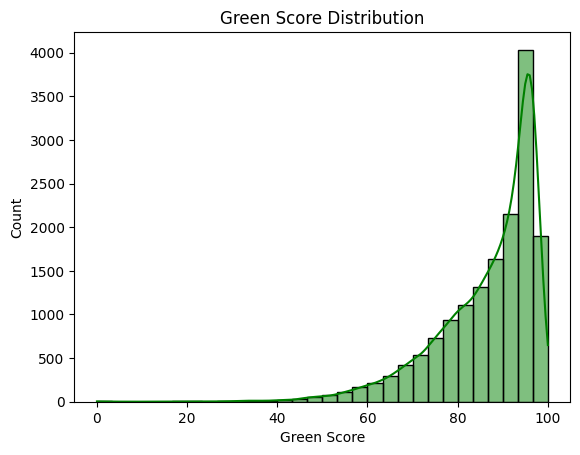

In [ ]:
# ✅ STEP 6: Visualize using seaborn/matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Green Score Distribution
sns.histplot(results_df['Green_Score'], bins=30, kde=True, color='green')
plt.title('Green Score Distribution')
plt.xlabel('Green Score')
plt.ylabel('Count')
plt.show()

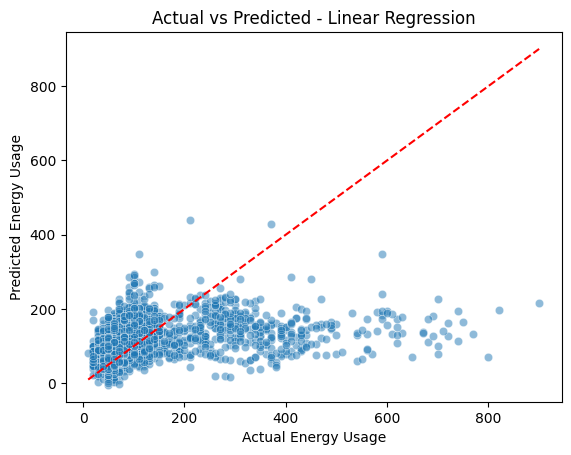

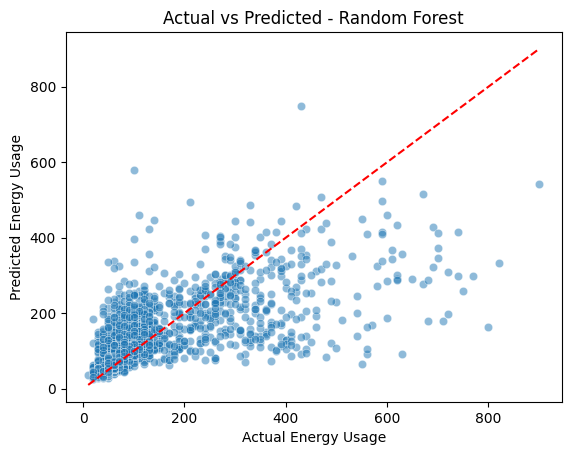

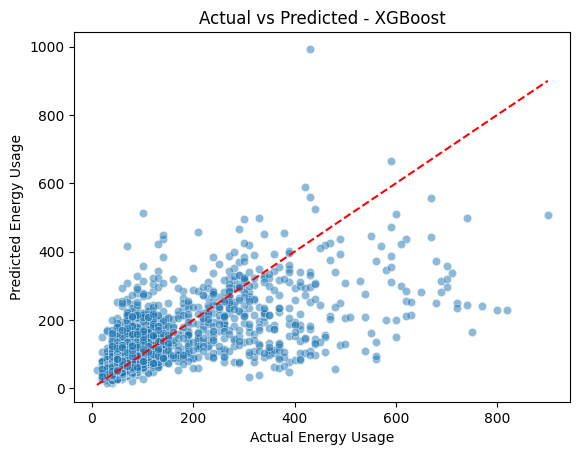

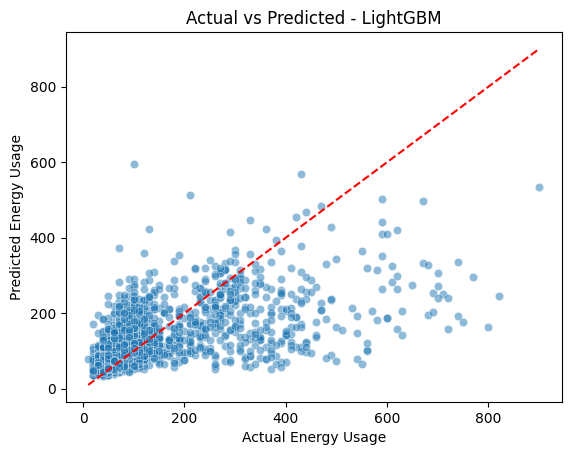

In [ ]:
# Actual vs Predicted for all models
for model_name in results_df['Model'].unique():
    sample = results_df[results_df['Model'] == model_name]
    sns.scatterplot(x='Actual', y='Predicted', data=sample, alpha=0.5)
    plt.plot([sample['Actual'].min(), sample['Actual'].max()],
             [sample['Actual'].min(), sample['Actual'].max()], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Actual Energy Usage')
    plt.ylabel('Predicted Energy Usage')
    plt.show()

/tmp/ipython-input-23-1704395898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(10), x='Importance', y='Feature', palette='YlGn')


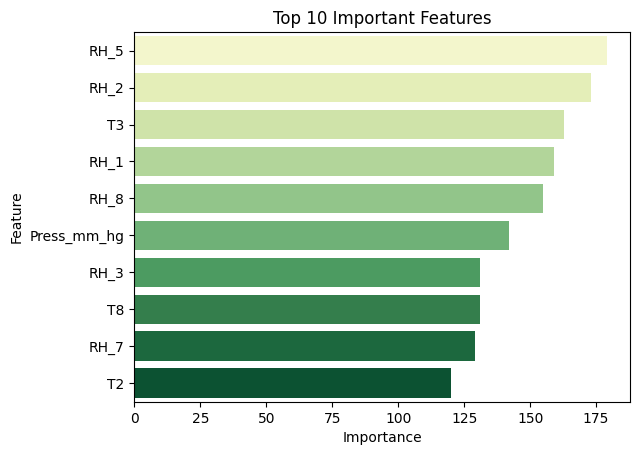

In [ ]:
# Feature Importance Plot
sns.barplot(data=imp_df.head(10), x='Importance', y='Feature', palette='YlGn')
plt.title('Top 10 Important Features')
plt.show()

Regression Metrics for All Models

In [ ]:
model_metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    model_metrics.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    })

metrics_df = pd.DataFrame(model_metrics)
print("📊 Regression Performance Summary:")
print(metrics_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6334
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 27
[LightGBM] [Info] Start training from score 97.949709
📊 Regression Performance Summary:
               Model    MAE   RMSE  R2 Score
0  Linear Regression  52.54  91.17    0.1693
1      Random Forest  32.70  68.35    0.5332
2            XGBoost  36.31  71.71    0.4861
3           LightGBM  38.66  74.99    0.4381


📊  Green Score Labels

In [ ]:
def categorize(score):
    if score >= 80:
        return 'High'
    elif score >= 50:
        return 'Medium'
    else:
        return 'Low'

results_df['Green_Label'] = results_df['Green_Score'].apply(categorize)
results_df['Efficiency'] = results_df['Green_Label']


 Confusion Matrix-Like Plot

/tmp/ipython-input-20-1097118270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightgbm_preds['Actual_Label'] = lightgbm_preds['Actual'].apply(lambda x: 'High' if x < 50 else 'Medium' if x < 150 else 'Low')
/tmp/ipython-input-20-1097118270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightgbm_preds['Predicted_Label'] = lightgbm_preds['Green_Label']


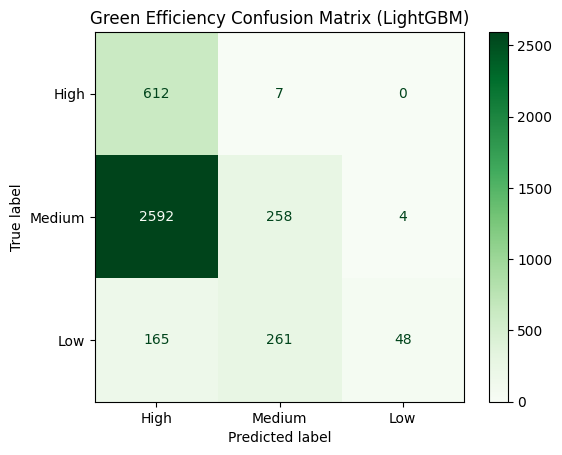

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use LightGBM predictions for illustration
lightgbm_preds = results_df[results_df['Model'] == 'LightGBM']
lightgbm_preds['Actual_Label'] = lightgbm_preds['Actual'].apply(lambda x: 'High' if x < 50 else 'Medium' if x < 150 else 'Low')
lightgbm_preds['Predicted_Label'] = lightgbm_preds['Green_Label']

cm = confusion_matrix(lightgbm_preds['Actual_Label'], lightgbm_preds['Predicted_Label'], labels=['High', 'Medium', 'Low'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Medium', 'Low'])

disp.plot(cmap='Greens')
plt.title("Green Efficiency Confusion Matrix (LightGBM)")
plt.show()


In [ ]:
code = '''
# ✅ Streamlit App: Green Score Predictor
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor

import streamlit as st
# Load model and data
@st.cache_data
def load_model():
    model = LGBMRegressor(n_estimators=100)
    return model

@st.cache_data
def load_scaler(X):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler

# Load dataset for feature reference
df = pd.read_csv("energydata_complete.csv")
df.drop(columns=['date'], inplace=True)
df.dropna(inplace=True)
df = df.select_dtypes(include=[np.number])

X = df.drop(columns=['Appliances'])
y = df['Appliances']
scaler = load_scaler(X)
model = load_model()
model.fit(scaler.transform(X), y)

# Streamlit Interface
st.title("🔋 Green Score Predictor for Appliances")
st.markdown("Estimate energy consumption and green score based on building parameters.")

# Sidebar input
st.sidebar.header("Input Sensor Readings")
input_data = {}
for col in X.columns[:10]:
    input_data[col] = st.sidebar.slider(col, float(X[col].min()), float(X[col].max()), float(X[col].mean()))

# Optional: Add remaining features as expandable
with st.sidebar.expander("Advanced Features"):
    for col in X.columns[10:]:
        input_data[col] = st.slider(col, float(X[col].min()), float(X[col].max()), float(X[col].mean()))

# Prediction
data_df = pd.DataFrame([input_data])
data_scaled = scaler.transform(data_df)
pred = model.predict(data_scaled)[0]

# Green Score Calculation
pred_min = y.min()
pred_max = y.max()
green_score = 100 - ((pred - pred_min) / (pred_max - pred_min)) * 100
green_score = np.clip(green_score, 0, 100)

# Display results
st.metric("🔌 Predicted Appliance Consumption (Wh)", f"{pred:.2f} Wh")
st.metric("🌿 Green Score", f"{green_score:.1f} / 100")

# Plotting
st.subheader("📊 Feature Impact (Top 10)")
model.fit(scaler.transform(X), y)
importances = model.feature_importances_
imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)
sns.barplot(data=imp_df, x='Importance', y='Feature', palette='Greens_r')
st.pyplot(plt.gcf())
'''

with open("green_score_app.py", "w") as f:
    f.write(code)

print("✅ green_score_app.py created successfully.")


✅ green_score_app.py created successfully.
